# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


計算集中趨勢   
+ 平均值 Mean
+ 中位數 Median
+ 眾數 Mode


計算資料分散程度
+ 最小值 Min
+ 最大值 Max
+ 範圍 Range
+ 四分位差 Quartiles
+ 變異數 Variance
+ 標準差 Standard deviation

In [4]:
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Covariance Matrix Of Values
app_train.cov()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.056582e+10,-59.041266,-83.819815,-4.436777e+07,-1.419730e+07,-6.449708e+05,-8.802091e+06,1.207224,-6.727735e+05,1.984012e+07,...,4.698847,0.419252,2.482850e+00,5.313017e-01,-23.040329,-24.972988,44.172238,45.722000,83.687998,895.504293
TARGET,-5.904127e+01,0.074212,0.003774,-2.572156e+02,-3.329871e+03,-5.060535e+01,-3.990170e+03,-0.000140,9.301338e+01,-1.729247e+03,...,-0.000195,-0.000009,1.321271e-06,1.848698e-05,0.000021,0.000080,0.000043,-0.003047,-0.000429,0.009943
CNT_CHILDREN,-8.381982e+01,0.003774,0.521459,2.205820e+03,6.235671e+02,2.237060e+02,-4.874046e+02,-0.000255,1.042894e+03,-2.446582e+04,...,0.000261,0.000015,1.606428e-05,-3.237726e-05,-0.000025,-0.000029,-0.000362,-0.007184,-0.004515,-0.056364
AMT_INCOME_TOTAL,-4.436777e+07,-257.215642,2205.819942,5.622739e+10,1.497168e+10,6.587001e+08,1.398799e+10,245.308712,2.820962e+07,-2.151468e+09,...,66.645285,13.926151,1.292048e+00,-2.554992e+00,14.770630,80.990699,121.371432,5619.742206,958.417938,5427.589564
AMT_CREDIT,-1.419730e+07,-3329.870551,623.567129,1.497168e+10,1.619988e+11,4.492695e+09,1.467708e+11,555.237032,-9.737131e+07,-3.800575e+09,...,1240.755318,206.931388,2.811662e+02,-1.189319e+02,-132.577892,189.999626,-105.628431,20190.890033,5119.011266,-36660.699977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-2.497299e+01,0.000080,-0.000029,8.099070e+01,1.899996e+02,3.483036e+00,1.924912e+02,0.000002,1.076188e+00,7.381734e+00,...,0.000136,0.000003,-3.196824e-07,-2.236985e-06,0.002139,0.012267,0.004929,-0.000533,-0.000388,-0.000695
AMT_REQ_CREDIT_BUREAU_WEEK,4.417224e+01,0.000043,-0.000362,1.213714e+02,-1.056284e+02,4.087934e+01,-7.655799e+01,-0.000006,-1.178121e+00,8.871663e+01,...,-0.000088,-0.000007,-8.745033e-06,2.978878e-07,0.000081,0.004929,0.041896,-0.002643,-0.002457,0.007238
AMT_REQ_CREDIT_BUREAU_MON,4.572200e+01,-0.003047,-0.007184,5.619742e+03,2.019089e+04,5.160230e+02,1.920311e+04,0.000990,5.414437e+00,-4.453034e+03,...,-0.000132,-0.000063,2.839846e-05,-5.913206e-05,-0.000001,-0.000533,-0.002643,0.839060,-0.005665,-0.008518
AMT_REQ_CREDIT_BUREAU_QRT,8.368800e+01,-0.000429,-0.004515,9.584179e+02,5.119011e+03,1.156772e+02,4.847840e+03,-0.000014,-4.037508e+01,1.719070e+03,...,-0.000375,-0.000031,-1.935589e-05,-2.844195e-05,-0.000181,-0.000388,-0.002457,-0.005665,0.630524,0.113117


In [6]:
print(list(app_train['AMT_INCOME_TOTAL'])[:10])
len(app_train['AMT_INCOME_TOTAL'])

[202500.0, 270000.0, 67500.0, 135000.0, 121500.0, 99000.0, 171000.0, 360000.0, 112500.0, 135000.0]


307511

In [7]:
def hw(x,bins):
    # Mean
#     print("Mean: ", app_train[x].mean())
#     # Median
#     print("Median: ", app_train[x].median())
#     # Mode
#     print("Mode: ", app_train[x].mode()[0])
#     # Min
#     print("Min: ", app_train[x].min())
#     # Max
#     print("Max: ", app_train[x].max())
#     # Quartiles
#     y = 0.5
#     print("Quartiles on ", y*100,"%: ", app_train[x].quantile(y))
#     # Variance
#     print("Variance: ", app_train[x].var())
#     # Standard deviation
#     print("Standard deviation: ", app_train[x].std())
    print("="*30)
    describe = app_train[x].describe().apply(lambda x: round(x, 1))  # 取小數第一位
    print("用describe可以直接列出以下常用數值\n", describe)

    #直方圖（Histogram)
    plt.hist(app_train[x],
             bins=bins,
             # bins=[100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000], 
             alpha=0.7, rwidth=0.9)
    plt.xlabel(x)
    plt.ylabel('Quantity')
    plt.title('My Histogram')
    plt.show()

AMT_INCOME_TOTAL
用describe可以直接列出以下常用數值
 count       307511.0
mean        168797.9
std         237123.1
min          25650.0
25%         112500.0
50%         147150.0
75%         202500.0
max      117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64


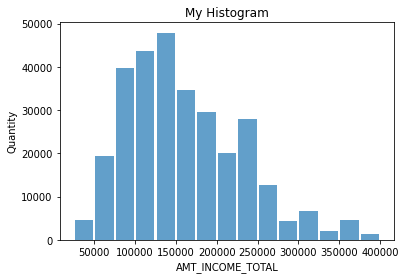

In [8]:
x = 'AMT_INCOME_TOTAL'
bins = [25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000]
print(x)
hw(x,bins)

AMT_CREDIT
用describe可以直接列出以下常用數值
 count     307511.0
mean      599026.0
std       402490.8
min        45000.0
25%       270000.0
50%       513531.0
75%       808650.0
max      4050000.0
Name: AMT_CREDIT, dtype: float64


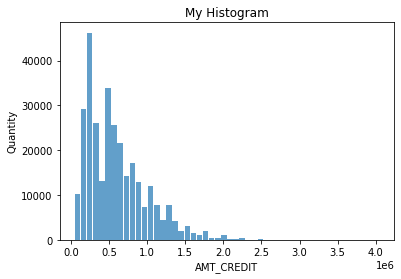

In [9]:
x = 'AMT_CREDIT'
bins = 50
print(x)
hw(x,bins)

AMT_ANNUITY
用describe可以直接列出以下常用數值
 count    307499.0
mean      27108.6
std       14493.7
min        1615.5
25%       16524.0
50%       24903.0
75%       34596.0
max      258025.5
Name: AMT_ANNUITY, dtype: float64


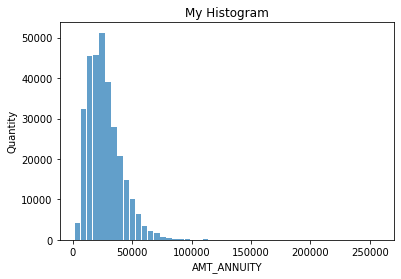

In [10]:
x = 'AMT_ANNUITY'
bins = 50
print(x)
hw(x,bins)